In [2]:
import requests
import json 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import DistanceMetric
%matplotlib inline
import numpy

In [3]:
data_file = pd.read_csv('historic_data.csv')

In [4]:
df = pd.DataFrame(data_file)
df

,Unnamed: 0,aqi,pm10,pm25,o3,timestamp_local,so2,no2,timestamp_utc,datetime,co,ts,city
0,0,63.0,24.77,18.01,26.31,2022-03-01T00:00:00,3.59,53.84,2022-03-01T05:00:00,2022-03-01:05,606.03,1646110800,New York
1,1,61.0,18.39,17.16,26.15,2022-02-28T23:00:00,2.04,51.71,2022-03-01T04:00:00,2022-03-01:04,556.06,1646107200,New York
2,2,59.0,12.00,9.00,26.00,2022-02-28T22:00:00,0.50,49.58,2022-03-01T03:00:00,2022-03-01:03,506.09,1646103600,New York
3,3,57.0,12.00,9.00,31.54,2022-02-28T21:00:00,0.50,44.79,2022-03-01T02:00:00,2022-03-01:02,556.47,1646100000,New York
4,4,34.0,11.00,8.20,46.00,2022-02-28T20:00:00,0.25,33.33,2022-03-01T01:00:00,2022-03-01:01,467.16,1646096400,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13455,13455,67.0,29.00,20.00,14.50,2022-02-01T04:00:00,0.63,38.75,2022-02-01T09:00:00,2022-02-01:09,430.52,1643706000,Washington DC
13456,13456,67.0,24.88,19.67,10.33,2022-02-01T03:00:00,0.42,40.42,2022-02-01T08:00:00,2022-02-01:08,428.23,1643702400,Washington DC
13457,13457,66.0,20.76,19.33,6.17,2022-02-01T02:00:00,0.21,42.08,2022-02-01T07:00:00,2022-02-01:07,425.94,1643698800,Washington DC
13458,13458,65.0,16.64,12.48,2.00,2022-02-01T01:00:00,0.00,43.75,2022-02-01T06:00:00,2022-02-01:06,423.65,1643695200,Washington DC


In [6]:
#Rearranging historic data df by city - list of all values for each pollutant 
#city_dictionary = {"New York":{'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Los Angeles": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Chicago": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Houston": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Phoenix": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "San Antonio": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Philadelphia": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "San Diego": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Dallas": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Austin": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "San Jose": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Fort Worth": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Jacksonville": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Charlotte": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Columbus": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Indianapolis": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "San Francisco": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Seattle": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Denver": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Washington DC": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}}
#city_dictionary = {"New York":{'aqi':[],'pm10':[]}}
city_dictionary = {"New York":{'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Los Angeles": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Chicago": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Houston": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Phoenix": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "San Antonio": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Philadelphia": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "San Diego": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Dallas": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Austin": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "San Jose": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Fort Worth": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Jacksonville": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Charlotte": {'aqi':[],'pm10':[],'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Columbus": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Indianapolis": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "San Francisco": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Seattle": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Denver": {'aqi':[],'pm10':[], 'pm25':[],'o3':[], 'so2':[], 'no2':[], 'co':[]}, 
                   "Washington DC": {'aqi':[],'pm10':[], 'pm25':[], 'o3':[], 'so2':[], 'no2':[], 'co':[]}}


for city in city_dictionary: 
    for i, row in df.iterrows():
        if row['city'] == city:
            city_dictionary[city]['aqi'].append(row['aqi'])
            city_dictionary[city]['pm10'].append(row['pm10'])
            city_dictionary[city]['pm25'].append(row['pm25'])
            city_dictionary[city]['o3'].append(row['o3'])
            city_dictionary[city]['so2'].append(row['so2'])
            city_dictionary[city]['no2'].append(row['no2'])
            city_dictionary[city]['co'].append(row['co'])
#city_dictionary

In [7]:
#take average of each polluntant 
import numpy as np
average_poll_dict = {"New York":{'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Los Angeles": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Chicago": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Houston": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Phoenix": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "San Antonio": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Philadelphia": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "San Diego": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Dallas": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Austin": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "San Jose": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Fort Worth": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Jacksonville": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Charlotte": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Columbus": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Indianapolis": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "San Francisco": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Seattle": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Denver": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}, "Washington DC": {'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}}

#average_poll_dict = {"New York":{'aqi':0,'pm10':0, 'pm25':0, 'o3':0, 'so2':0, 'no2':0, 'co':0}}
#average_poll_dict = {"New York":{'aqi':0, 'pm10':0}}

#print(city_dictionary)
for city in city_dictionary:
    #print('CITY',city)
    for pollutant in city_dictionary[city]:
        #print('POL', pollutant)#for each list of polluntants in each city 
        length = len(city_dictionary[city][pollutant]) 
        #print('lenght', length)
        poll_sum = 0
        for item in city_dictionary[city][pollutant]: #summing all values for each polluntant 
            if not np.isnan(item):  
                #print('item', item)
                poll_sum += item
        #print('SUM', poll_sum)
        average = poll_sum/length 
        average_poll_dict[city][pollutant] = average            
print(average_poll_dict)


{'New York': {'aqi': 50.69539375928677, 'pm10': 17.147652303120356, 'pm25': 11.61026745913819, 'o3': 47.396835066864746, 'so2': 0.7052897473997026, 'no2': 22.68157503714709, 'co': 409.449732540862}, 'Los Angeles': {'aqi': 64.69985141158989, 'pm10': 39.02365527488856, 'pm25': 17.53240713224369, 'o3': 50.87392273402673, 'so2': 0.4883060921248134, 'no2': 24.2668647845468, 'co': 493.7887964338785}, 'Chicago': {'aqi': 50.0445765230312, 'pm10': 15.41640416047548, 'pm25': 9.57479940564636, 'o3': 57.90325408618126, 'so2': 4.787043090638935, 'no2': 14.24041604754827, 'co': 432.3749182763748}, 'Houston': {'aqi': 22.450222882615154, 'pm10': 3.6205497771173856, 'pm25': 2.7551263001485866, 'o3': 44.923670133729544, 'so2': 1.0827340267459138, 'no2': 5.224145616641898, 'co': 371.20799405646386}, 'Phoenix': {'aqi': 49.524517087667164, 'pm10': 15.088647845468051, 'pm25': 9.352704309063894, 'o3': 40.31780089153047, 'so2': 4.123090638930162, 'no2': 12.553016344725108, 'co': 426.28985141158984}, 'San Anto

In [8]:
#Average of each polluntant 
average_poll_df = pd.DataFrame(average_poll_dict)
average_poll_df

,New York,Los Angeles,Chicago,Houston,Phoenix,San Antonio,Philadelphia,San Diego,Dallas,Austin,San Jose,Fort Worth,Jacksonville,Charlotte,Columbus,Indianapolis,San Francisco,Seattle,Denver,Washington DC
aqi,50.695394,64.699851,50.044577,22.450223,49.524517,45.910847,27.334324,29.904903,42.077266,35.095097,70.161961,23.531947,32.472511,45.156018,47.744428,47.682021,54.118871,52.139673,46.542348,46.218425
pm10,17.147652,39.023655,15.416404,3.620550,15.088648,29.108752,6.312556,8.875944,8.513195,4.712377,20.221501,6.634398,7.516300,13.854740,12.632110,15.959851,14.506270,15.194279,13.791545,16.301902
pm25,11.610267,17.532407,9.574799,2.755126,9.352704,10.616642,4.026999,4.525557,6.379569,3.793343,15.342169,3.544205,5.032511,9.080461,9.087712,11.203031,11.075958,10.316568,9.070357,10.705111
o3,47.396835,50.873923,57.903254,44.923670,40.317801,60.090520,52.290371,58.686196,46.451917,57.745230,49.042600,45.215067,47.333730,53.707192,51.436152,35.451085,44.416419,37.287816,52.314859,53.458722
so2,0.705290,0.488306,4.787043,1.082734,4.123091,1.513908,1.198752,0.919747,0.449421,1.017697,4.809361,1.338603,2.519480,0.221932,1.734666,3.295275,1.359629,0.278366,0.361010,0.296672
no2,22.681575,24.266865,14.240416,5.224146,12.553016,12.191144,5.152229,3.014339,20.965453,6.850728,19.475899,8.497964,6.802630,13.177920,5.779777,10.279539,17.678351,18.699539,13.265929,16.454814
co,409.449733,493.788796,432.374918,371.207994,426.289851,347.018455,363.318470,339.889421,648.962214,385.437207,576.954220,379.844339,362.254487,337.199822,357.416404,399.606582,508.813091,363.105929,337.745973,331.463210


In [9]:
import numpy as np
from numpy.linalg import norm

In [11]:
scores = []
city1 = 'New York'
#print(city_dictionary[city1])
#information about the target song (song1) in a array 
target_city = np.array([average_poll_dict[city1]['aqi'], average_poll_dict[city1]['pm10'], average_poll_dict[city1]['pm25']])

for city in average_poll_dict:
    this_city =  np.array([average_poll_dict[city]['aqi'], average_poll_dict[city]['pm10'], average_poll_dict[city]['pm25']])
    this_city_info = {'name':city, 'aqi':average_poll_dict[city]['aqi']}
    
    cosine = np.dot(target_city,this_city)/(norm(target_city)*norm(this_city))
    
    scores.append({'city_info':this_city_info, 'score': cosine})
    
for similar_city in sorted(scores, key=lambda x: x["score"], reverse=True)[:10]:
    print(similar_city["city_info"]["name"], similar_city["score"])
    for feature in similar_city['city_info']:
        print("\t", feature, ": ", similar_city['city_info'][feature])

New York 1.0
	 name :  New York
	 aqi :  50.69539375928677
Indianapolis 0.9999795807824768
	 name :  Indianapolis
	 aqi :  47.682020802377416
Washington DC 0.9999192710571715
	 name :  Washington DC
	 aqi :  46.2184249628529
Charlotte 0.999330193004692
	 name :  Charlotte
	 aqi :  45.156017830609215
Chicago 0.9991033315023
	 name :  Chicago
	 aqi :  50.0445765230312
San Jose 0.9989862129932883
	 name :  San Jose
	 aqi :  70.16196136701338
Phoenix 0.9989453905087367
	 name :  Phoenix
	 aqi :  49.524517087667164
Denver 0.998885346870194
	 name :  Denver
	 aqi :  46.542347696879645
Seattle 0.9987930925015471
	 name :  Seattle
	 aqi :  52.13967310549777
San Francisco 0.997849488726165
	 name :  San Francisco
	 aqi :  54.11887072808321


In [12]:
scores = []
city1 = 'Houston'
#print(city_dictionary[city1])
#information about the target song (song1) in a array 
target_city = np.array([average_poll_dict[city1]['aqi'], average_poll_dict[city1]['pm10'], average_poll_dict[city1]['pm25']])

for city in average_poll_dict:
    this_city =  np.array([average_poll_dict[city]['aqi'], average_poll_dict[city]['pm10'], average_poll_dict[city]['pm25']])
    this_city_info = {'name':city, 'aqi':average_poll_dict[city]['aqi']}
    
    cosine = np.dot(target_city,this_city)/(norm(target_city)*norm(this_city))
    
    scores.append({'city_info':this_city_info, 'score': cosine})
    
for similar_city in sorted(scores, key=lambda x: x["score"], reverse=True)[:11]:
    print(similar_city["city_info"]["name"], similar_city["score"])
    for feature in similar_city['city_info']:
        print("\t", feature, ": ", similar_city['city_info'][feature])

Houston 1.0
	 name :  Houston
	 aqi :  22.450222882615154
Austin 0.9995596875685032
	 name :  Austin
	 aqi :  35.09509658246657
Dallas 0.998861619778712
	 name :  Dallas
	 aqi :  42.077265973254086
Philadelphia 0.9975487922385895
	 name :  Philadelphia
	 aqi :  27.334323922734026
Jacksonville 0.9973313602071822
	 name :  Jacksonville
	 aqi :  32.472511144130756
Columbus 0.9933579637293392
	 name :  Columbus
	 aqi :  47.7444279346211
Fort Worth 0.993247674563158
	 name :  Fort Worth
	 aqi :  23.531946508172364
San Francisco 0.9921576476438847
	 name :  San Francisco
	 aqi :  54.11887072808321
San Diego 0.9916073078076156
	 name :  San Diego
	 aqi :  29.904903417533433
Seattle 0.9902972252093291
	 name :  Seattle
	 aqi :  52.13967310549777
Denver 0.9899363481265906
	 name :  Denver
	 aqi :  46.542347696879645


In [13]:
scores = []
city1 = 'San Jose'
#print(city_dictionary[city1])
#information about the target song (song1) in a array 
target_city = np.array([average_poll_dict[city1]['aqi'], average_poll_dict[city1]['pm10'], average_poll_dict[city1]['pm25']])

for city in average_poll_dict:
    this_city =  np.array([average_poll_dict[city]['aqi'], average_poll_dict[city]['pm10'], average_poll_dict[city]['pm25']])
    this_city_info = {'name':city, 'aqi':average_poll_dict[city]['aqi']}
    
    cosine = np.dot(target_city,this_city)/(norm(target_city)*norm(this_city))
    
    scores.append({'city_info':this_city_info, 'score': cosine})
    
for similar_city in sorted(scores, key=lambda x: x["score"], reverse=True)[:11]:
    print(similar_city["city_info"]["name"], similar_city["score"])
    for feature in similar_city['city_info']:
        print("\t", feature, ": ", similar_city['city_info'][feature])

San Jose 1.0000000000000002
	 name :  San Jose
	 aqi :  70.16196136701338
Seattle 0.9998080746940543
	 name :  Seattle
	 aqi :  52.13967310549777
San Francisco 0.9997605593274468
	 name :  San Francisco
	 aqi :  54.11887072808321
Denver 0.9997227277423204
	 name :  Denver
	 aqi :  46.542347696879645
Charlotte 0.9997121170464619
	 name :  Charlotte
	 aqi :  45.156017830609215
Chicago 0.9994955674186369
	 name :  Chicago
	 aqi :  50.0445765230312
Phoenix 0.9994871469340989
	 name :  Phoenix
	 aqi :  49.524517087667164
Columbus 0.9994523063844039
	 name :  Columbus
	 aqi :  47.7444279346211
Indianapolis 0.9990686383210466
	 name :  Indianapolis
	 aqi :  47.682020802377416
New York 0.9989862129932883
	 name :  New York
	 aqi :  50.69539375928677
Washington DC 0.9983337792857515
	 name :  Washington DC
	 aqi :  46.2184249628529


In [14]:
import requests
import json 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.neighbors import DistanceMetric
%matplotlib inline
import numpy
from sklearn.cluster import KMeans

In [15]:
average_poll_trans = average_poll_df.transpose()
average_poll_trans

,aqi,pm10,pm25,o3,so2,no2,co
New York,50.695394,17.147652,11.610267,47.396835,0.705290,22.681575,409.449733
Los Angeles,64.699851,39.023655,17.532407,50.873923,0.488306,24.266865,493.788796
Chicago,50.044577,15.416404,9.574799,57.903254,4.787043,14.240416,432.374918
Houston,22.450223,3.620550,2.755126,44.923670,1.082734,5.224146,371.207994
Phoenix,49.524517,15.088648,9.352704,40.317801,4.123091,12.553016,426.289851
San Antonio,45.910847,29.108752,10.616642,60.090520,1.513908,12.191144,347.018455
Philadelphia,27.334324,6.312556,4.026999,52.290371,1.198752,5.152229,363.318470
San Diego,29.904903,8.875944,4.525557,58.686196,0.919747,3.014339,339.889421
Dallas,42.077266,8.513195,6.379569,46.451917,0.449421,20.965453,648.962214
Austin,35.095097,4.712377,3.793343,57.745230,1.017697,6.850728,385.437207


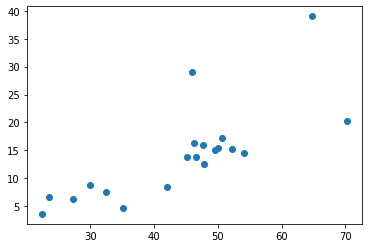

In [16]:
plt.scatter(average_poll_trans['aqi'],average_poll_trans['pm10'])

In [17]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [28]:
#Predicted Clusters 
y_predicted = km.fit_predict(average_poll_trans[['aqi', 'pm10', 'pm25']])
y_predicted

array([1, 2, 1, 0, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [29]:
average_poll_trans['cluster'] = y_predicted
average_poll_trans

,aqi,pm10,pm25,o3,so2,no2,co,cluster
New York,50.695394,17.147652,11.610267,47.396835,0.705290,22.681575,409.449733,1
Los Angeles,64.699851,39.023655,17.532407,50.873923,0.488306,24.266865,493.788796,2
Chicago,50.044577,15.416404,9.574799,57.903254,4.787043,14.240416,432.374918,1
Houston,22.450223,3.620550,2.755126,44.923670,1.082734,5.224146,371.207994,0
Phoenix,49.524517,15.088648,9.352704,40.317801,4.123091,12.553016,426.289851,1
San Antonio,45.910847,29.108752,10.616642,60.090520,1.513908,12.191144,347.018455,1
Philadelphia,27.334324,6.312556,4.026999,52.290371,1.198752,5.152229,363.318470,0
San Diego,29.904903,8.875944,4.525557,58.686196,0.919747,3.014339,339.889421,0
Dallas,42.077266,8.513195,6.379569,46.451917,0.449421,20.965453,648.962214,1
Austin,35.095097,4.712377,3.793343,57.745230,1.017697,6.850728,385.437207,0


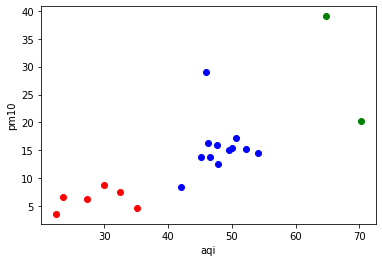

In [34]:
#Displaying clusters by color 
dfc0 = average_poll_trans[average_poll_trans.cluster == 0]
dfc1 = average_poll_trans[average_poll_trans.cluster == 1]
dfc2 = average_poll_trans[average_poll_trans.cluster == 2]
#dfc3 = df2[df2.cluster == 3]

plt.scatter(dfc0['aqi'],dfc0['pm10'],color='red')
plt.scatter(dfc1['aqi'],dfc1['pm10'],color='blue')
plt.scatter(dfc2['aqi'],dfc2['pm10'],color='green')
#plt.scatter(dfc3['aqi'],dfc3['pm10'],color='yellow')

plt.xlabel('aqi')
plt.ylabel('pm10')
#plt.legend()

plt.savefig('clusterscatterfinal.png')

In [33]:
average_poll_trans.to_csv('averag_poll_trans3.csv')